In [1]:
import SimpleITK as sitk

from platipy.imaging import ImageVisualiser

In [24]:
img_ct_from_pet = sitk.ReadImage("./HN_CHUM_002/IMAGES/HN_CHUM_002_0_CT.nii.gz")
img_ct_planning = sitk.ReadImage("./HN_CHUM_002/IMAGES/HN_CHUM_002_1_CT.nii.gz")

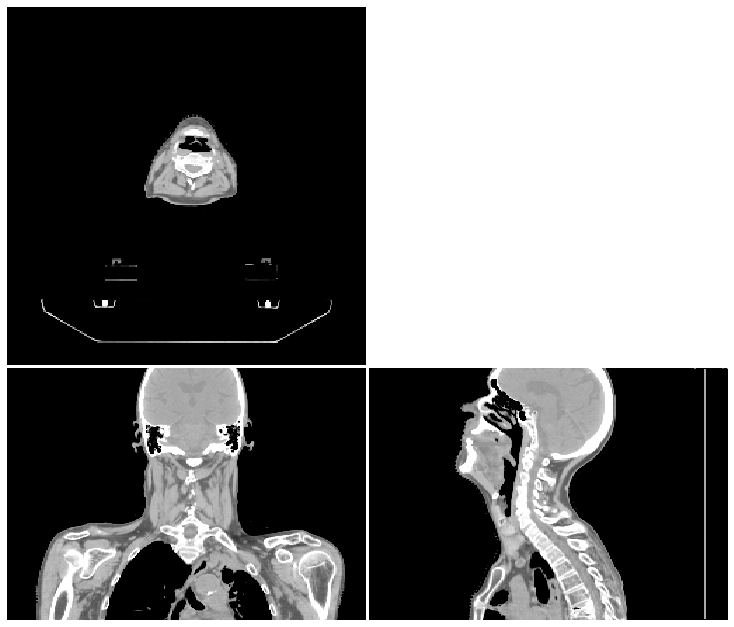

In [25]:
vis = ImageVisualiser(img_ct_planning)
fig = vis.show()

In [10]:
from platipy.imaging.registration.linear import linear_registration

In [35]:
img_ct_pet_to_planning, tfm = linear_registration(
    img_ct_planning,
    img_ct_from_pet,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid',
    sampling_rate=1,
    verbose = True
)


  0 = 978515.53438
  1 = 962893.80366
  2 = 954820.08868
  3 = 927794.51099
  4 = 926105.76631
  5 = 891017.89951
  6 = 859543.65589
  7 = 860884.26618
  8 = 808521.13660
  9 = 875679.20220
 10 = 821187.11717
 11 = 878704.56178
 12 = 802751.86308
 13 = 893893.86547
 14 = 847435.99863


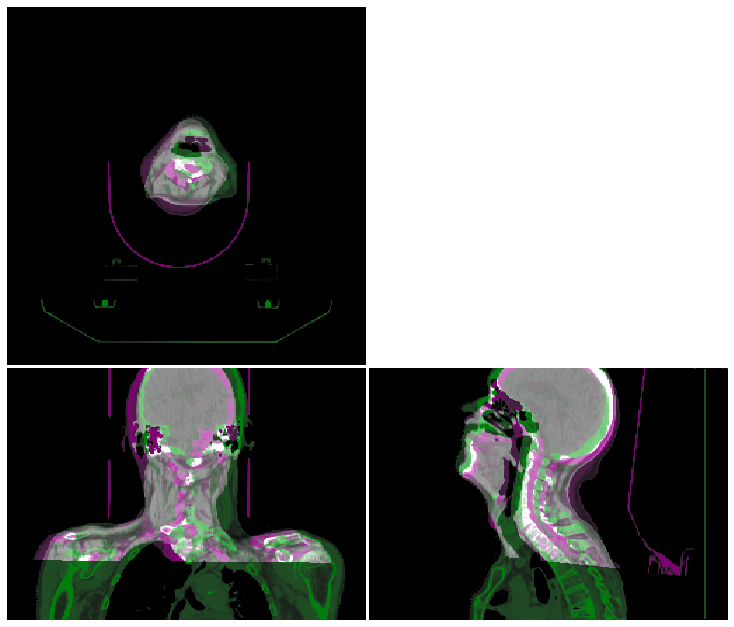

In [36]:
vis = ImageVisualiser(img_ct_planning)
vis.add_comparison_overlay(img_ct_pet_to_planning)
fig = vis.show()

In [37]:
img_pt = sitk.ReadImage("./HN_CHUM_002/IMAGES/HN_CHUM_002_0_PT.nii.gz")

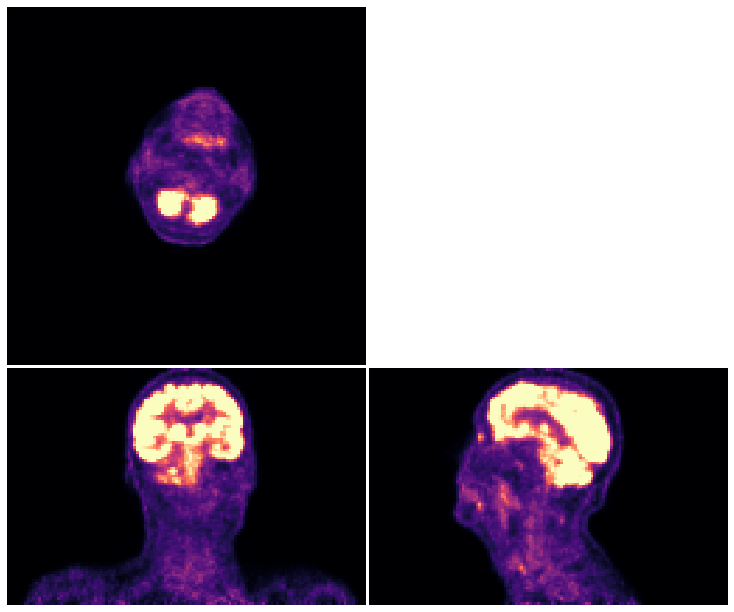

In [38]:
vis = ImageVisualiser(img_pt, window=(0,20000), colormap=plt.cm.magma)
fig = vis.show()

In [39]:
img_pt_res = sitk.Resample(img_pt, img_ct_from_pet, sitk.Transform(), sitk.sitkLinear)

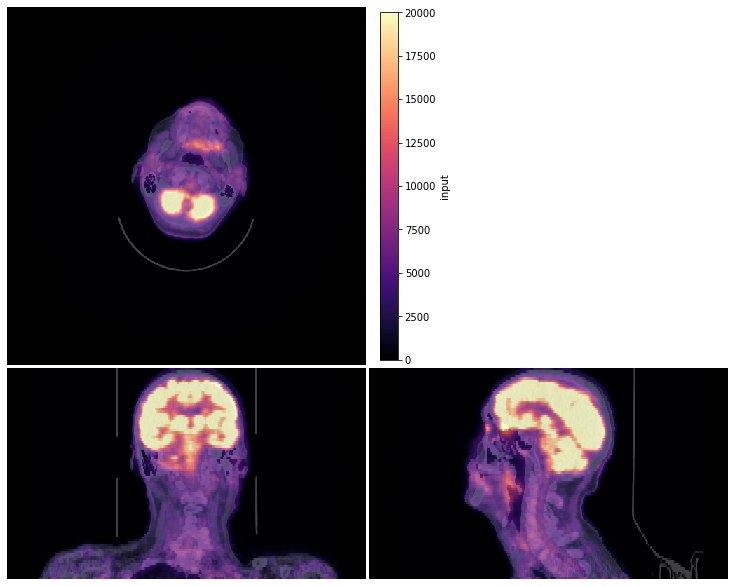

In [40]:
vis = ImageVisualiser(img_ct_from_pet)
vis.add_scalar_overlay(img_pt_res, max_value=20000, colormap=plt.cm.magma)
fig = vis.show()

In [41]:
from platipy.imaging.registration.utils import apply_transform

In [42]:
img_pt_to_planning = apply_transform(img_pt_res, img_ct_planning, tfm)

In [49]:
ctr = sitk.ReadImage("./HN_CHUM_002/STRUCTURES/HN_CHUM_002_1_RTSTRUCT_BRAIN.nii.gz")

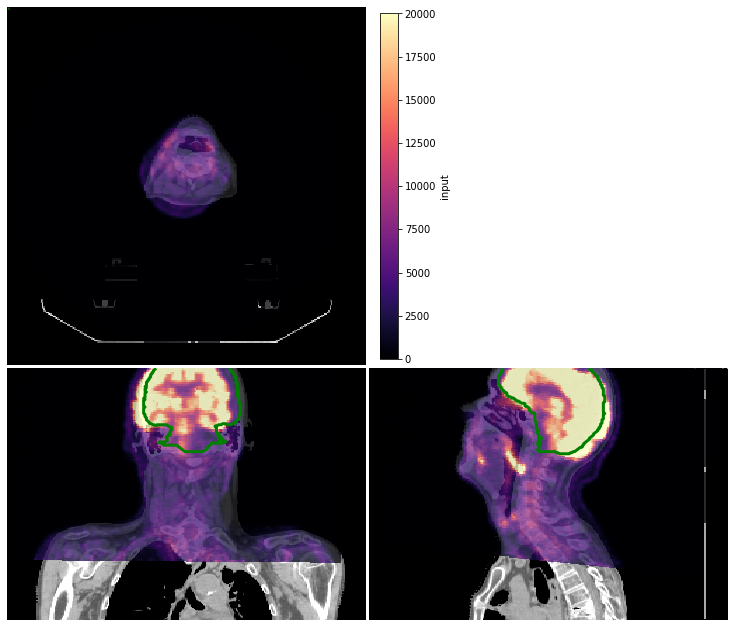

In [51]:
vis = ImageVisualiser(img_ct_planning)
vis.add_contour(ctr, color="green", linewidth=3)
vis.add_scalar_overlay(img_pt_to_planning, max_value=20000, colormap=plt.cm.magma)
fig = vis.show()